In [243]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [244]:
interactions_df = pd.read_csv('leads_interaction_details.csv')
interactions_df

,jnr_sm_id,lead_id,lead_stage,call_done_date,call_status,call_reason
0,JNR1001MG,USR1001,lead,1/2/2022,successful,lead_introduction
1,JNR1001MG,USR1001,lead,1/2/2022,successful,demo_schedule
2,JNR1001MG,USR1002,lead,1/3/2022,successful,lead_introduction
3,JNR1001MG,USR1002,lead,1/4/2022,successful,demo_schedule
4,JNR1001MG,USR1002,awareness,1/5/2022,successful,post_demo_followup
...,...,...,...,...,...,...
2187,JNR1001MG,USR1356,lead,2/21/2022,unsuccessful,lead_introduction
2188,JNR1001MG,USR1357,lead,1/8/2022,unsuccessful,lead_introduction
2189,JNR1001MG,USR1358,lead,1/12/2022,unsuccessful,lead_introduction
2190,JNR1001MG,USR1359,lead,1/22/2022,unsuccessful,lead_introduction


In [245]:
leads_df = pd.read_csv('leads_basic_details.csv')
leads_df = leads_df.query("age < 25")
leads_df

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source
0,USR1001,16,FEMALE,Hyderabad,Intermediate,Private Employee,social_media
1,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals
2,USR1003,20,FEMALE,Visakhapatnam,B.Tech,Lawyer,user_referrals
3,USR1004,16,MALE,Mumbai,Intermediate,IT Employee,user_referrals
4,USR1005,16,MALE,Chennai,Intermediate,Government Employee,user_referrals
...,...,...,...,...,...,...,...
354,USR1355,24,FEMALE,Visakhapatnam,Looking for Job,Lawyer,social_media
355,USR1356,21,MALE,Mumbai,Degree,Government Employee,user_referrals
356,USR1357,22,MALE,Chennai,Looking for Job,Government Employee,website
358,USR1359,18,FEMALE,Mumbai,B.Tech,Government Employee,email_marketing


In [246]:
demos_df = pd.read_csv('leads_demo_watched_details.csv')
demos_df = demos_df[demos_df.watched_percentage <= 100]
demos_df

,lead_id,demo_watched_date,language,watched_percentage
0,USR1002,1/4/2022,Telugu,42
1,USR1003,1/7/2022,Telugu,81
2,USR1004,1/2/2022,Telugu,35
3,USR1005,1/3/2022,Hindi,38
4,USR1006,1/12/2022,Hindi,54
...,...,...,...,...
189,USR1317,2/25/2022,English,48
190,USR1318,2/25/2022,English,83
191,USR1319,2/28/2022,English,84
192,USR1343,1/25/2022,English,68


In [247]:
awareness_stage = interactions_df.query("lead_stage == 'awareness'")
intro_end_ids = pd.merge(leads_df,awareness_stage,how='left',on='lead_id').query("lead_stage != 'awareness'").lead_id.unique()

In [248]:
intro_end = interactions_df[interactions_df.lead_id.isin(list(intro_end_ids))]

In [249]:
lead_stage = interactions_df.query("lead_stage == 'lead'")
lead_stage.call_reason.value_counts()

demo_not_attended    701
lead_introduction    499
demo_schedule        347
Name: call_reason, dtype: int64

In [250]:
lead_introduction = lead_stage.query("call_reason == 'lead_introduction'")
lead_introduction.call_status.value_counts()

successful      329
unsuccessful    170
Name: call_status, dtype: int64

In [251]:
no_interest_df = pd.read_csv('leads_reasons_for_no_interest.csv')
no_interest_df['reason'] = no_interest_df[no_interest_df.columns[1:]].apply(lambda x: "".join(x.dropna()),axis=1)
no_interest_df.loc[no_interest_df.reason == 'Cannot afford'] = "Can't afford"
no_interest_df.reason.value_counts()

Can't afford                        99
Wants offline classes               91
Student not interested in domain    52
No time for student                 38
Will join in final year             14
Name: reason, dtype: int64

In [104]:
unsucc_lead_intro = lead_introduction.query("call_status == 'unsuccessful'")

In [114]:
unsucc_lead_reasons = pd.merge(intro_end,no_interest_df,on='lead_id')
unsucc_lead_reasons = unsucc_lead_reasons[['reasons_for_not_interested_in_demo']]

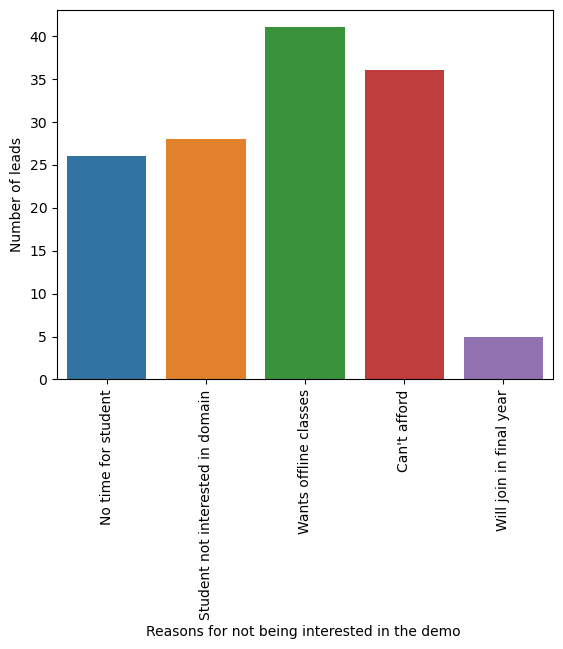

In [252]:
unsucc_lead_reasons = no_interest_df[no_interest_df.lead_id.isin(intro_end_ids)][['reasons_for_not_interested_in_demo']]
sns.countplot(x='reasons_for_not_interested_in_demo',data=unsucc_lead_reasons)
plt.xticks(rotation=90)
plt.xlabel('Reasons for not being interested in the demo ')
plt.ylabel('Number of leads');

(array([20., 36., 31., 38., 16.]),
 array([16. , 17.6, 19.2, 20.8, 22.4, 24. ]),
 <BarContainer object of 5 artists>)

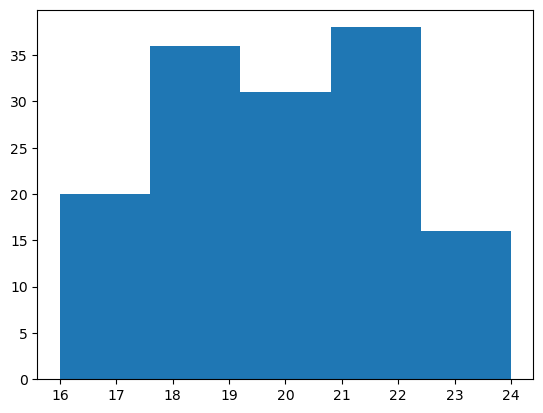

In [387]:
intro_end_details = leads_df[leads_df.lead_id.isin(intro_end_ids)]
plt.hist(data=intro_end_details,x='age',bins=5)

In [254]:
intro_end_details.current_education.value_counts()

B.Tech             67
Looking for Job    38
Intermediate       20
Degree             16
Name: current_education, dtype: int64

In [255]:
intro_end_details.lead_gen_source.value_counts()

social_media       38
user_referrals     31
SEO                26
email_marketing    24
website            22
Name: lead_gen_source, dtype: int64

In [256]:
leads_df.lead_gen_source.value_counts()

social_media       78
email_marketing    63
user_referrals     62
SEO                56
website            52
Name: lead_gen_source, dtype: int64

In [257]:
leads_df.current_city.value_counts()

Visakhapatnam    71
Hyderabad        70
Kochi            56
Bengaluru        42
Mumbai           41
Chennai          31
Name: current_city, dtype: int64

## Leads stopped at Awareness

In [258]:
consider_stage = interactions_df.query("lead_stage == 'consideration'")
consider_end_ids = pd.merge(awareness_stage,consider_stage,how='left',on='lead_id').query("lead_stage_y != 'consideration'").lead_id.unique()
consider_end = interactions_df[interactions_df.lead_id.isin(consider_end_ids)]

In [259]:
no_interest_df[no_interest_df.lead_id.isin(consider_end_ids)]

,lead_id,reasons_for_not_interested_in_demo,reasons_for_not_interested_to_consider,reasons_for_not_interested_to_convert,reason
1,USR1003,NaN,No time for student,NaN,No time for student
2,USR1004,NaN,Wants offline classes,NaN,Wants offline classes
3,USR1005,NaN,Can't afford,NaN,Can't afford
4,USR1006,NaN,Student not interested in domain,NaN,Student not interested in domain
5,USR1008,NaN,Will join in final year,NaN,Will join in final year
...,...,...,...,...,...
239,USR1298,NaN,Can't afford,NaN,Can't afford
248,USR1310,NaN,Student not interested in domain,NaN,Student not interested in domain
249,USR1315,NaN,Wants offline classes,NaN,Wants offline classes
251,USR1318,NaN,Wants offline classes,NaN,Wants offline classes


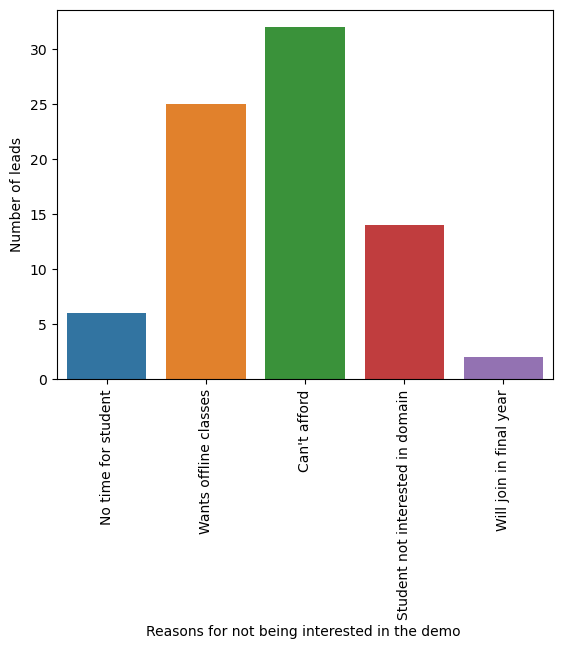

In [260]:
unsucc_lead_reasons = no_interest_df[no_interest_df.lead_id.isin(consider_end_ids)][['reasons_for_not_interested_to_consider']]
sns.countplot(x='reasons_for_not_interested_to_consider',data=unsucc_lead_reasons)
plt.xticks(rotation=90)
plt.xlabel('Reasons for not being interested in the demo ')
plt.ylabel('Number of leads');

(array([20., 36., 31., 38., 16.]),
 array([16. , 17.6, 19.2, 20.8, 22.4, 24. ]),
 <BarContainer object of 5 artists>)

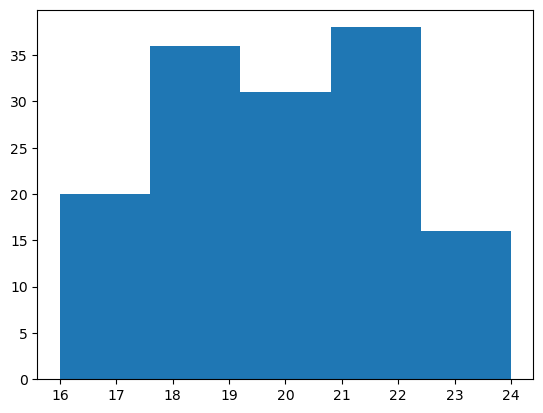

In [388]:
consider_end_details = leads_df[leads_df.lead_id.isin(consider_end_ids)]
plt.hist(data=intro_end_details,x='age',bins=5)

In [262]:
demos_df.watched_percentage.unique()

array([ 42,  81,  35,  38,  54,  52,  41,  50,  48,  44,  46,  51,  47,
        40,  36, 100,   5,  53,   8,  10,  11,  14,  17,  20,  23,  55,
        73,  26,  29,  32,  56,  59,  62,  60,  65,  70,  74,  75,  68,
        85,  71,  86,  87,  88,  89,   2,  90,  91,  92,  77,  80,  63,
        83,  25,   3,   4,  30,  45,  64,  37,  66,  67,  49,  57,  69,
        61,  95,  15,  12,  13,  72,  19,  27,  21,  16,  76,  18,  79,
        78,  22,  24,  28,  82,  84], dtype=int64)

In [263]:
demos_df[demos_df.lead_id.isin(consider_end_ids)].watched_percentage.describe()

count     78.000000
mean      54.000000
std       24.722354
min        2.000000
25%       38.000000
50%       53.000000
75%       75.000000
max      100.000000
Name: watched_percentage, dtype: float64

In [264]:
np.arange(0,100+2,10)

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

<AxesSubplot:ylabel='watched_percentage'>

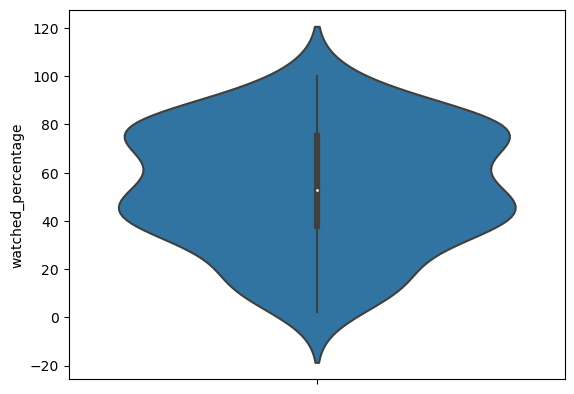

In [269]:
sns.violinplot(y='watched_percentage',data=demos_df[demos_df.lead_id.isin(consider_end_ids)])

<AxesSubplot:ylabel='watched_percentage'>

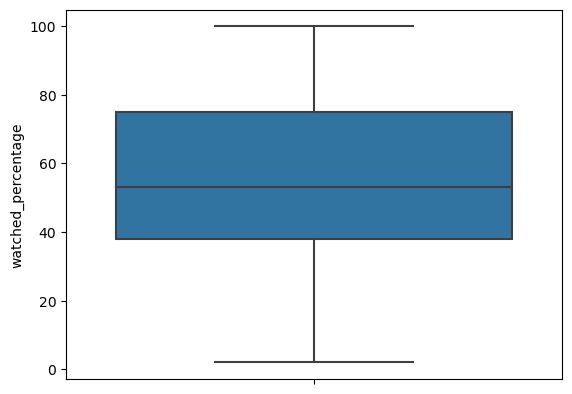

In [389]:
sns.boxplot(y='watched_percentage',data=demos_df[demos_df.lead_id.isin(consider_end_ids)])

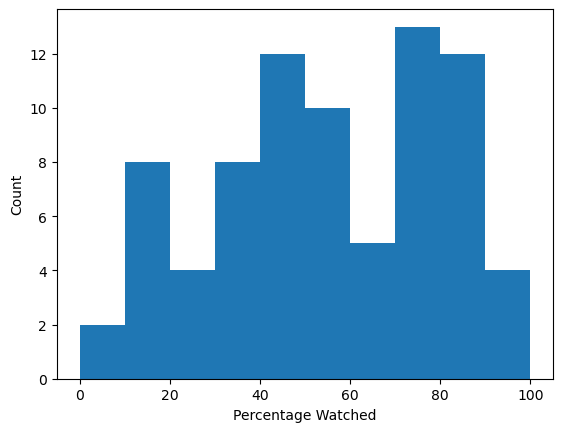

In [265]:
bins = np.arange(0,100+2,10)
plt.hist(demos_df[demos_df.lead_id.isin(consider_end_ids)].watched_percentage,bins=bins)
plt.xlabel('Percentage Watched')
plt.ylabel('Count');

In [270]:
num_of_interactions = consider_end.lead_id.value_counts(ascending=True).reset_index(name='count')
num_of_interactions.columns = ['lead_id','count']
num_of_interactions

,lead_id,count
0,USR1034,3
1,USR1004,3
2,USR1029,3
3,USR1026,3
4,USR1009,3
...,...,...
74,USR1150,7
75,USR1155,7
76,USR1163,7
77,USR1318,7


In [199]:
num_of_interactions['count'].value_counts()

7    49
4    11
3     9
5     6
6     3
8     1
Name: count, dtype: int64

In [271]:
sales_man_df = pd.read_csv('sales_managers_assigned_leads_details.csv')

In [272]:
high_num_of_interactions = num_of_interactions[num_of_interactions['count'] >= 7]
sale_mng = pd.merge(high_num_of_interactions,sales_man_df,on='lead_id').sort_values(by=['cycle','snr_sm_id','jnr_sm_id'])

# Leads stopped at Consideration Stage

In [403]:
conversion_stage = interactions_df.query("lead_stage == 'conversion'")
conversion_end_ids = pd.merge(consider_stage,conversion_stage,how='left',on='lead_id').query("lead_stage_y != 'conversion'").lead_id.unique()
conversion_end = interactions_df[interactions_df.lead_id.isin(conversion_end_ids)]

In [274]:
no_interest_df

,lead_id,reasons_for_not_interested_in_demo,reasons_for_not_interested_to_consider,reasons_for_not_interested_to_convert,reason
0,USR1001,No time for student,NaN,NaN,No time for student
1,USR1003,NaN,No time for student,NaN,No time for student
2,USR1004,NaN,Wants offline classes,NaN,Wants offline classes
3,USR1005,NaN,Can't afford,NaN,Can't afford
4,USR1006,NaN,Student not interested in domain,NaN,Student not interested in domain
...,...,...,...,...,...
289,Can't afford,Can't afford,Can't afford,Can't afford,Can't afford
290,Can't afford,Can't afford,Can't afford,Can't afford,Can't afford
291,USR1358,Wants offline classes,NaN,NaN,Wants offline classes
292,USR1359,Will join in final year,NaN,NaN,Will join in final year


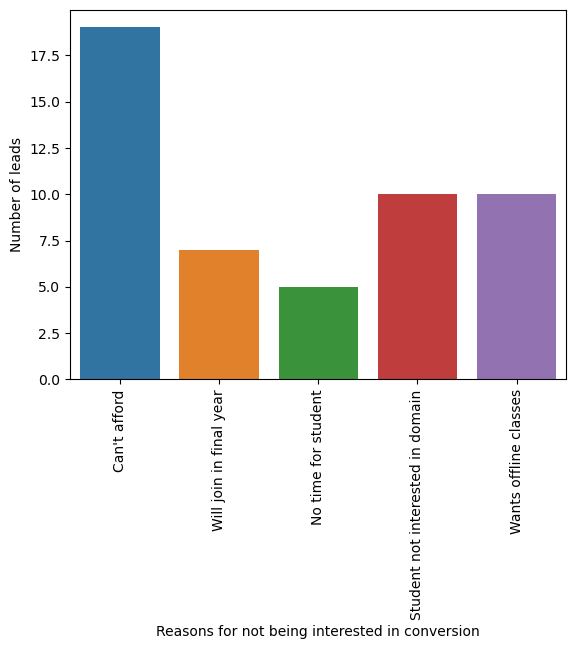

In [275]:
unsucc_lead_reasons = no_interest_df[no_interest_df.lead_id.isin(conversion_end_ids)][['reasons_for_not_interested_to_convert']]
sns.countplot(x='reasons_for_not_interested_to_convert',data=unsucc_lead_reasons)
plt.xticks(rotation=90)
plt.xlabel('Reasons for not being interested in conversion')
plt.ylabel('Number of leads');

<AxesSubplot:ylabel='watched_percentage'>

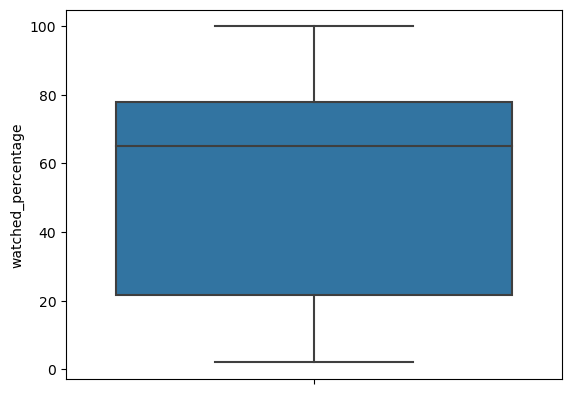

In [279]:
sns.boxplot(y='watched_percentage',data=demos_df[demos_df.lead_id.isin(conversion_end_ids)])

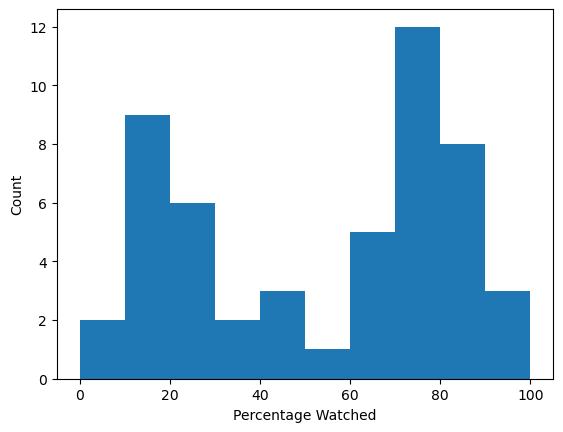

In [276]:
bins = np.arange(0,100+2,10)
plt.hist(demos_df[demos_df.lead_id.isin(conversion_end_ids)].watched_percentage,bins=bins)
plt.xlabel('Percentage Watched')
plt.ylabel('Count');

# Looking at converted leads

In [291]:
converted_leads = pd.merge(leads_df,conversion_stage,on='lead_id')
converted_leads.head()

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source,jnr_sm_id,lead_stage,call_done_date,call_status,call_reason
0,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals,JNR1001MG,conversion,1/7/2022,successful,successful_conversion
1,USR1007,16,FEMALE,Hyderabad,Intermediate,Professor/Faculty,social_media,JNR1001MG,conversion,1/14/2022,successful,successful_conversion
2,USR1011,20,FEMALE,Hyderabad,B.Tech,Private Employee,website,JNR1001MG,conversion,1/22/2022,successful,successful_conversion
3,USR1012,20,FEMALE,Hyderabad,B.Tech,Business,social_media,JNR1001MG,conversion,1/19/2022,successful,successful_conversion
4,USR1013,21,FEMALE,Hyderabad,Degree,Lawyer,SEO,JNR1001MG,conversion,1/21/2022,successful,successful_conversion


<AxesSubplot:xlabel='lead_gen_source', ylabel='count'>

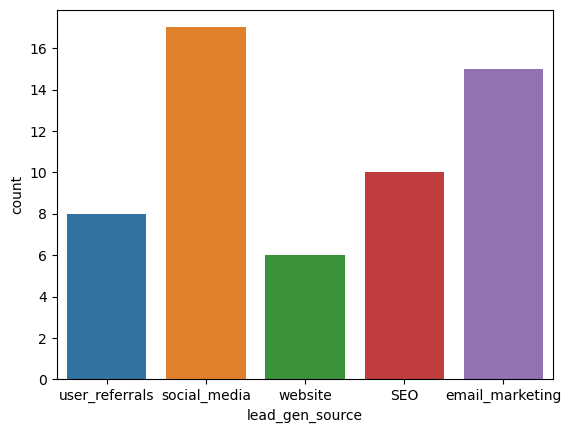

In [293]:
sns.countplot(x='lead_gen_source',data=converted_leads)

In [307]:
converted_leads.parent_occupation.value_counts() / leads_df.shape[0]

Business               0.064309
Government Employee    0.048232
Lawyer                 0.032154
IT Employee            0.019293
Professor/Faculty      0.009646
Private Employee       0.006431
Name: parent_occupation, dtype: float64

In [308]:
converted_leads.gender.value_counts() / converted_leads.shape[0]

FEMALE    0.678571
MALE      0.321429
Name: gender, dtype: float64

In [336]:
converted_leads.current_education.value_counts() / converted_leads.shape[0]

B.Tech             0.464286
Looking for Job    0.250000
Degree             0.214286
Intermediate       0.071429
Name: current_education, dtype: float64

In [391]:
converted_leads.current_city.value_counts() / converted_leads.shape[0]

Visakhapatnam    0.250000
Hyderabad        0.232143
Bengaluru        0.214286
Kochi            0.142857
Chennai          0.125000
Mumbai           0.035714
Name: current_city, dtype: float64

<AxesSubplot:ylabel='watched_percentage'>

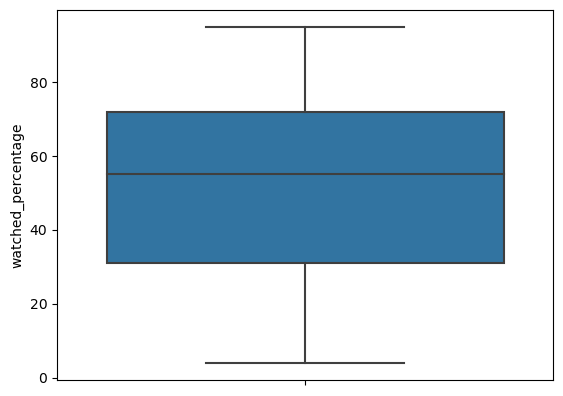

In [311]:
converted_demos = pd.merge(demos_df,conversion_stage,on='lead_id')
sns.boxplot(y='watched_percentage',data=converted_demos)

In [316]:
converted_demos.language.value_counts() / demos_df.shape[0]

English    0.218750
Telugu     0.088542
Hindi      0.020833
Name: language, dtype: float64

In [315]:
demos_df.language.value_counts() / demos_df.shape[0]

English    0.578125
Telugu     0.317708
Hindi      0.104167
Name: language, dtype: float64

In [329]:
jnr_sm_mng_conv = pd.merge(sales_man_df,converted_leads,on=['lead_id','jnr_sm_id'])
jnr_sm_mng_conv['days_taken'] = pd.to_datetime(jnr_sm_mng_conv.call_done_date) - pd.to_datetime(jnr_sm_mng_conv.assigned_date)

In [349]:
cant_afford = no_interest_df[no_interest_df['reason']=="Can't afford"]
cant_afford_details = pd.merge(cant_afford,leads_df,on='lead_id')


False

In [356]:
cant_afford_details.current_education.value_counts() / cant_afford_details.shape[0]

Looking for Job    0.506329
B.Tech             0.303797
Degree             0.113924
Intermediate       0.075949
Name: current_education, dtype: float64

In [361]:
cant_afford_details.gender.value_counts() / cant_afford_details.shape[0]

FEMALE    0.582278
MALE      0.417722
Name: gender, dtype: float64

In [358]:
cant_afford_details.parent_occupation.value_counts()

Government Employee    31
IT Employee            19
Business               18
Lawyer                 11
Name: parent_occupation, dtype: int64

(array([ 6., 11., 13., 30., 19.]),
 array([16. , 17.6, 19.2, 20.8, 22.4, 24. ]),
 <BarContainer object of 5 artists>)

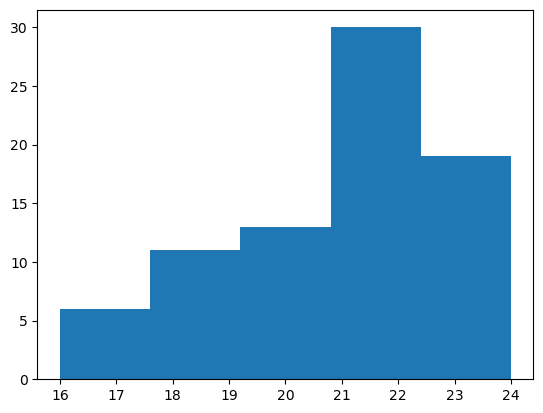

In [375]:
plt.hist(x='age',data=cant_afford_details,bins=5)

In [363]:
looking_for_job = cant_afford_details[cant_afford_details.current_education == "Looking for Job"]
looking_for_job.parent_occupation.value_counts()
## maybe get their parents involved

Government Employee    14
IT Employee            12
Business                9
Lawyer                  5
Name: parent_occupation, dtype: int64

In [366]:
offline_class = no_interest_df[no_interest_df['reason']=='Wants offline classes']
offline_class_details = pd.merge(leads_df,offline_class,on='lead_id')

In [393]:
offline_class_details.current_city.value_counts() / offline_class_details.shape[0]
## Maybe set up classes in this areas?

Visakhapatnam    0.260870
Mumbai           0.202899
Kochi            0.188406
Bengaluru        0.144928
Hyderabad        0.130435
Chennai          0.072464
Name: current_city, dtype: float64

In [381]:
no_interest_domain = no_interest_df[no_interest_df['reason']=='Student not interested in domain']
no_interest_domain_details = pd.merge(leads_df,no_interest_domain,on='lead_id')
no_interest_domain_details.current_education.value_counts() / leads_df.current_education.value_counts()
## Maybe offer course that fall in the studen

B.Tech             0.242424
Degree             0.166667
Intermediate       0.225000
Looking for Job    0.030928
Name: current_education, dtype: float64

(array([ 9., 17., 15.,  9.,  1.]),
 array([16. , 17.6, 19.2, 20.8, 22.4, 24. ]),
 <BarContainer object of 5 artists>)

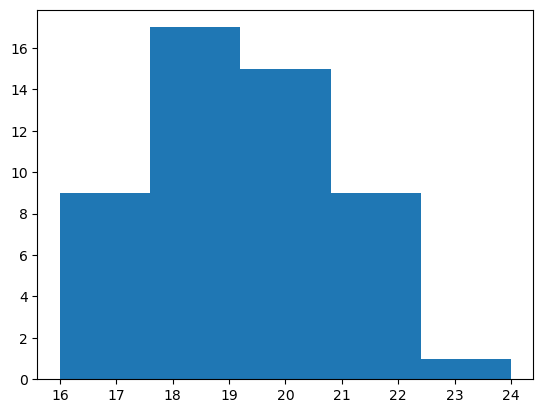

In [386]:
plt.hist(x='age',data=no_interest_domain_details,bins=5)

In [400]:
interactions_df['call_done_date'] = pd.to_datetime(interactions_df['call_done_date'])
interactions_df['call_day_done'] = interactions_df['call_done_date'].dt.day_name()
unsucc_calls = interactions_df[interactions_df.call_status == 'unsuccessful']
succ_calls = interactions_df[interactions_df.call_status == 'successful']

<AxesSubplot:xlabel='call_day_done', ylabel='count'>

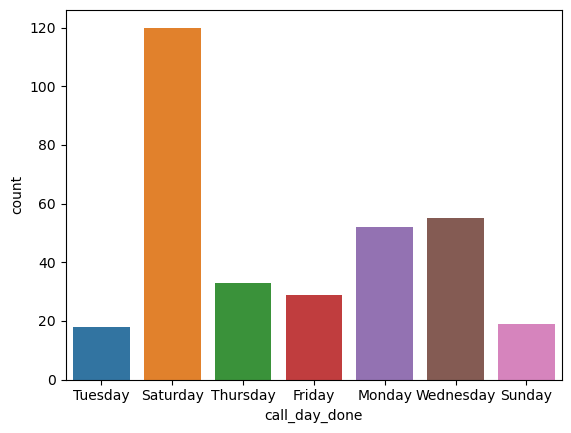

In [399]:
sns.countplot(x='call_day_done',data=unsucc_calls)

<AxesSubplot:xlabel='call_day_done', ylabel='count'>

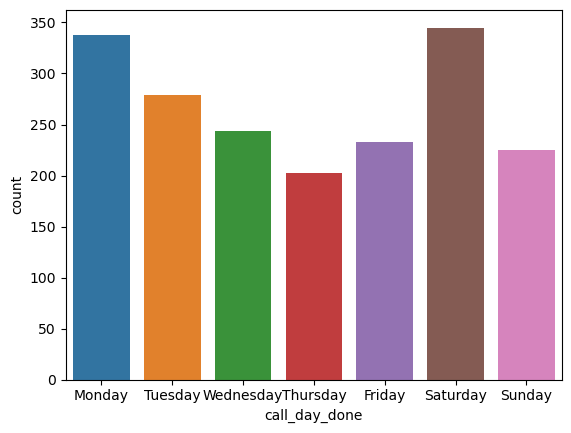

In [402]:
sns.countplot(x='call_day_done',data=succ_calls,order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

In [406]:
interactions_df[interactions_df.duplicated()]

,jnr_sm_id,lead_id,lead_stage,call_done_date,call_status,call_reason,call_day_done
8,JNR1001MG,USR1002,consideration,2022-01-07,successful,followup_for_conversion,Friday
32,JNR1001MG,USR1007,consideration,2022-01-14,successful,followup_for_conversion,Friday
91,JNR1001MG,USR1017,consideration,2022-02-21,successful,followup_for_conversion,Monday
113,JNR1002MG,USR1022,consideration,2022-01-09,successful,followup_for_conversion,Sunday
122,JNR1002MG,USR1023,consideration,2022-01-03,successful,followup_for_conversion,Monday
...,...,...,...,...,...,...,...
2102,JNR1016MG,USR1318,lead,2022-02-25,successful,demo_not_attended,Friday
2103,JNR1016MG,USR1318,lead,2022-02-25,successful,demo_not_attended,Friday
2126,JNR1015MG,USR1324,lead,2022-01-02,unsuccessful,demo_schedule,Sunday
2128,JNR1001MG,USR1325,lead,2022-01-01,unsuccessful,lead_introduction,Saturday


False

<AxesSubplot:ylabel='watched_percentage'>

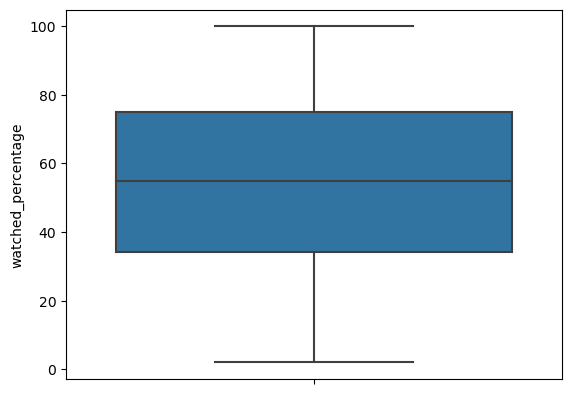

In [410]:
sns.boxplot(y='watched_percentage',data=demos_df)

<AxesSubplot:xlabel='lead_gen_source', ylabel='count'>

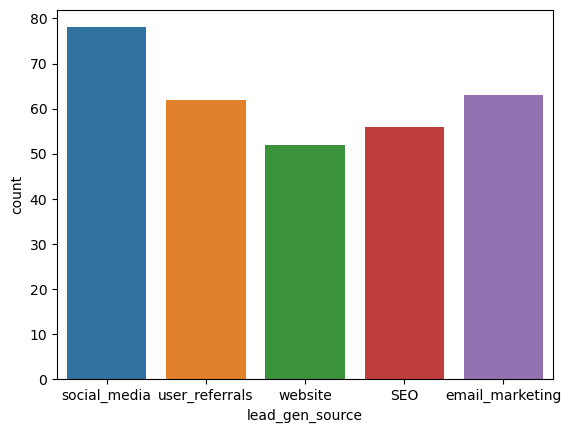

In [412]:
sns.countplot(x='lead_gen_source',data=leads_df)

<AxesSubplot:xlabel='language', ylabel='watched_percentage'>

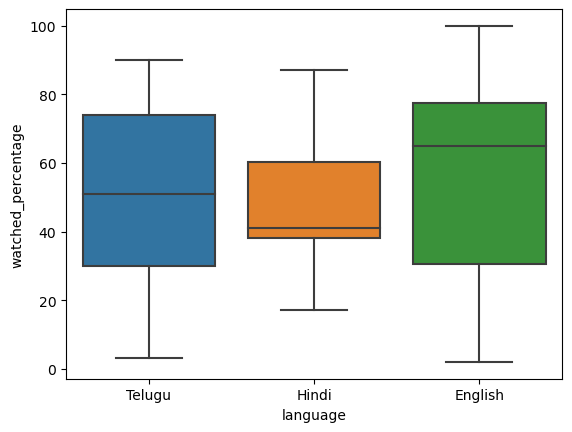

In [414]:
sns.boxplot(x='language',y='watched_percentage',data=demos_df)

In [ ]:
demos_df.la